In [1]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 15})
import numpy as np
import pandas as pd

In [3]:
def spider(df, id_column):
    cols = df['x']
    cols=['x'] + cols.tolist()
    df = df.drop(columns=['x'])
    df = df.T
    df = df.reset_index()
    df.columns = cols

    categories = df._get_numeric_data().columns.tolist()
    data = df[categories].to_dict(orient='list')
    ids = df[id_column].tolist()
    max_values = {key: max(value) for key, value in data.items()}
    min_values = {key: min(value) for key, value in data.items()}
        
    normalized_data = {key: (np.array(value)-min_values[key]) / (max_values[key]-min_values[key]) for key, value in data.items()}
    print(normalized_data)
    num_vars = len(data.keys())
    tiks = list(data.keys())
    tiks += tiks[:1]
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + [0]
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    max_val = 0
    for i, model_name in enumerate(ids):
        values = [normalized_data[key][i] for key in data.keys()]
        values += values[:1]  # Close the plot for a better look
        ax.plot(angles, values, label=model_name)
        ax.fill(angles, values, alpha=0.15)
        max_val = max(max_val, max(values))

    ax.spines['polar'].set_visible(False)
            
    ax.fill(angles, np.ones(num_vars + 1), alpha=0.05)
    ax.set_yticklabels([])
    ax.set_xticks(angles)
    ax.set_xticklabels(tiks)

    
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    num_rings = 3
    # Compute the maximum radius
    max_radius = max_val.max()

    # Generate radial tick locations based on the desired number of rings
    radii = np.linspace(0, max_radius, num_rings + 1)[1:]
    ax.set_rticks(radii)
    for radius in radii:
        for i, cat in enumerate(tiks):
            ha='left'
            if angles[i]==0 and radius==radii[-1]:
                ha='right'
            ax.text(angles[i], radius, f'{radius*(max_values[cat]-min_values[cat])+min_values[cat]:.1f}', 
                    ha=ha, va='center', fontsize=10)
            
    ax.text(angles[i], 0, f'N/A', 
            ha='left', va='center', fontsize=10)
    plt.show()

In [53]:
def spider(df, id_column, colors=None, linestyle=None, alpha=None, alpha_fill=None):
    cols = df['x']
    cols=['x'] + cols.tolist()
    df = df.drop(columns=['x'])
    df = df.T
    df = df.reset_index()
    df.columns = cols

    categories = df._get_numeric_data().columns.tolist()
    if linestyle is None:
        linestyle = ['-']*len(categories)
    data = df[categories]
    ids = df[id_column].tolist()
    ranges = {col: (np.linspace(data[col].min(), data[col].max(), 3)*2)/2 for col in data.columns}

    normalized = (data-data.min())/(data.max()-data.min())*(1-0.33)+0.33
    
    normalized = normalized.fillna(0)
    num_vars = len(data.keys())
    tiks = list(data.keys())
    tiks += tiks[:1]
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + [0]
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    max_val = 0
    for i, model_name in enumerate(ids):
        values = [normalized[key].iloc[i] for key in data.keys()]
        values += values[:1]  # Close the plot for a better look
        if colors is not None:
            ax.plot(angles, values, label=model_name, color=colors[i], linestyle=linestyle[i], alpha=alpha[i])
            ax.fill(angles, values, alpha=alpha_fill[i], color=colors[i])
        else:
            ax.plot(angles, values, label=model_name, linestyle=linestyle[i], alpha=alpha[i])
            ax.fill(angles, values, alpha=alpha_fill[i])
        max_val = max(max_val, max(values))

    ax.spines['polar'].set_visible(False)
            
    ax.fill(angles, np.ones(num_vars + 1), alpha=0.05)
    ax.set_yticklabels([])
    ax.set_xticks(angles)
    ax.set_xticklabels(tiks, fontsize=14)
    ax.tick_params(axis='x', pad=35)
    
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=14)

    num_rings = 3
    # Compute the maximum radius
    max_radius = max_val.max()

    # Generate radial tick locations based on the desired number of rings
    radii = np.linspace(0, max_radius, num_rings + 1)[1:]
    ax.set_rticks(radii)
    for r_idx, radius in enumerate(radii):
        for i, cat in enumerate(tiks):
            ha='left'
            if angles[i]==0 and radius==radii[-1]:
                ha='right'
            ax.text(angles[i], radius, f'{ranges[cat][r_idx]:.1f}', 
                    ha=ha, va='center', fontsize=10)
            
    ax.text(angles[i], 0, f'N/A', 
            ha='left', va='center', fontsize=10)
    plt.show()

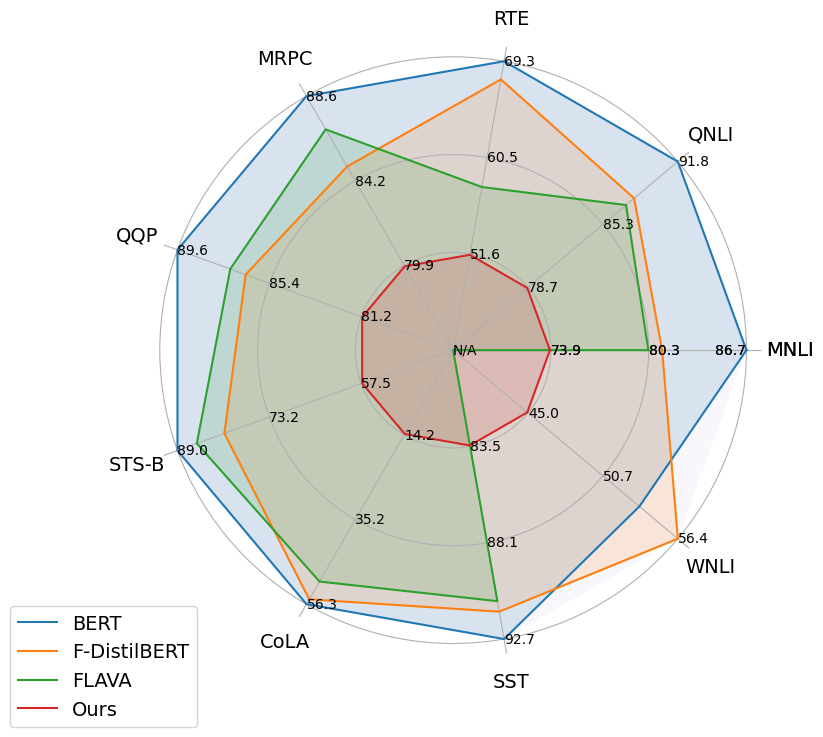

In [42]:
df = pd.DataFrame({
        'x': ['MNLI', 'QNLI', 'RTE', 'MRPC', 'QQP', 'STS-B', 'CoLA', 'SST', 'WNLI'],
        'BERT': [86.7, 91.8, 69.3, 88.6, 89.6, 89.0, 56.3, 92.7, 53.5, ],
        'F-DistilBERT': [81.2, 88.0, 67.64, 85.0, 86.5, 81.0, 55.1, 91.4, 56.4,],
        'FLAVA': [80.3, 87.3, 57.8, 86.9, 87.2, 85.7, 50.7, 90.9, np.nan],
        'Ours': [73.88, 78.71, 51.6, 79.9, 81.2, 57.5, 14.2, 83.5, 45.04,],
    })
df
spider(
    df,
    id_column='x',
    alpha=[1, 1, 1, 1, ], alpha_fill=[0.15, 0.15,0.15, 0.15]
)

In [48]:
categories = ['ImageNet-1K\nClassification\n(Finetune)', 'ImageNet-1K\nClassification\n(Lin eval)', 
              'CIFAR-10\n(Finetune)', 'CIFAR-10\n(Lin eval)', 
              'CIFAR-100\n(Finetune)', 'CIFAR-100\n(Lin eval)']

df = pd.DataFrame({
        'x': categories,
        'BEiTv2': [85.0, 80.1, 98.8, 94.4, 91.1, 78.5],
        'DistilData2Vec2': [76.0, 71.1, 97.7, 93.2, 87.2, 77.3,],
        'FLAVA': [np.nan, 75.5, np.nan, 93.4, np.nan, 78.37],
        'Ours': [75.5, 65.0, 97.6, 89.7, 85.2, 71.3,],
    })
df['sort_key'] = df['x'].str.extract(r'\((.*?)\)')
df = df.sort_values(by='sort_key')
df = df.drop(columns=['sort_key'])

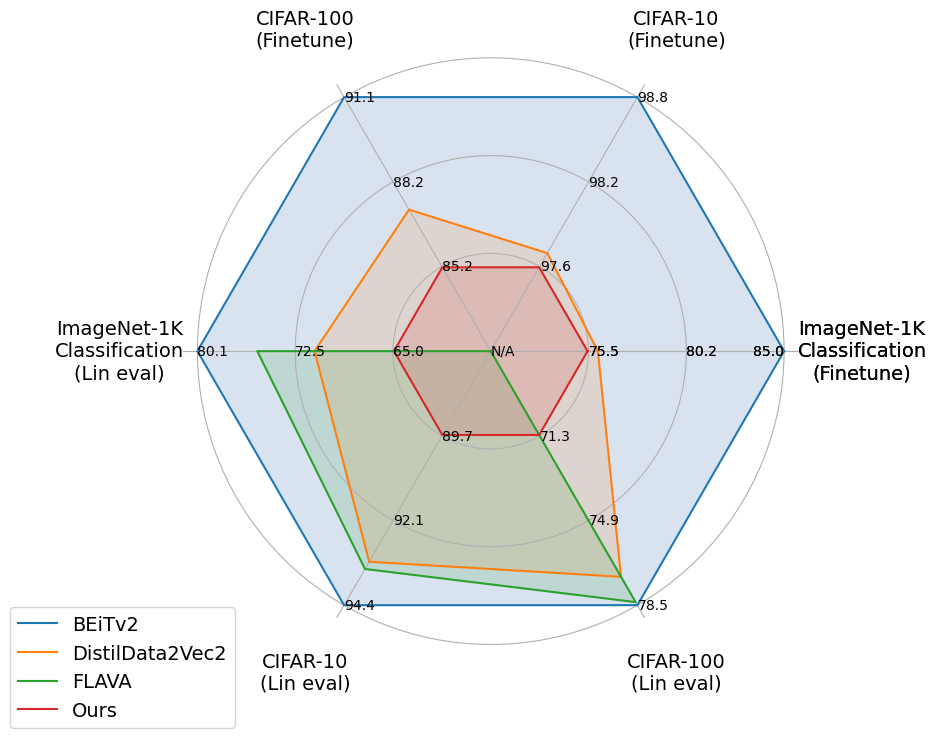

In [57]:
spider(df, id_column='x',
    alpha=[1, 1, 1, 1, ], alpha_fill=[0.15, 0.15,0.15, 0.15])

In [25]:
categories = ['COCO\nI2T', 'COCO\nT2I', 
              'Flickr30K\nI2T', 'Flickr30K\nT2I', ]


df = pd.DataFrame({
        'x': categories,
        'BEiT-3': [93.2, 82.57, 99.33, 96.17, ],
        'CLIP': [76.0, 57.47, 95.37, 84.83, ], 
        'Ours, no teacher': [69.97, 58.5, 79.7, 68.57,],
        'Ours': [74.72, 59.81, 86.33, 73.46,],
        'Ours, finetuned': [76.9, 62.9, 91.8, 81.7,],
    })

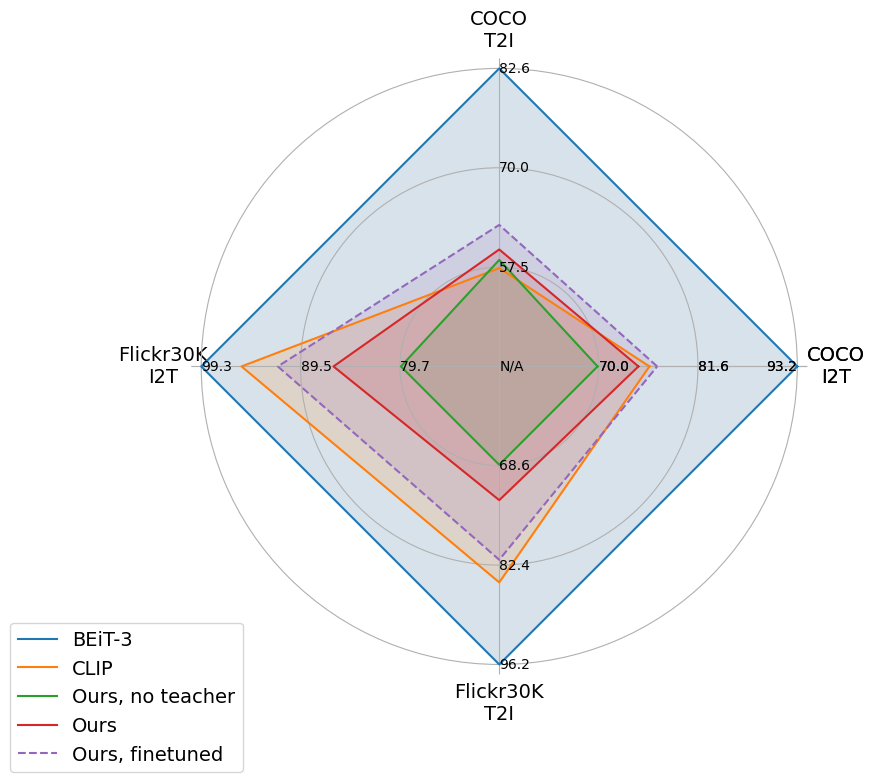

In [35]:
spider(df, id_column='x', linestyle=['-', '-', '-', '-', '--'],
       alpha=[1, 1, 1, 1, 1], alpha_fill=[0.15,0.15, 0.15, 0.15, 0.15])

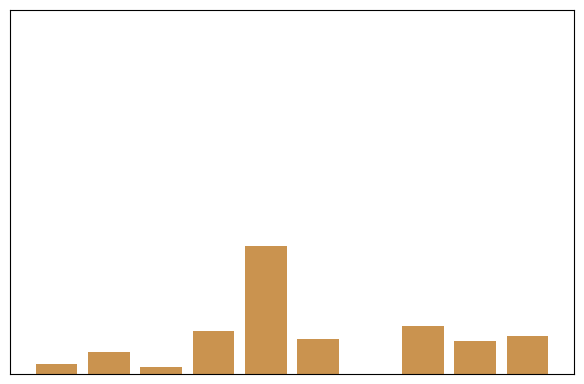

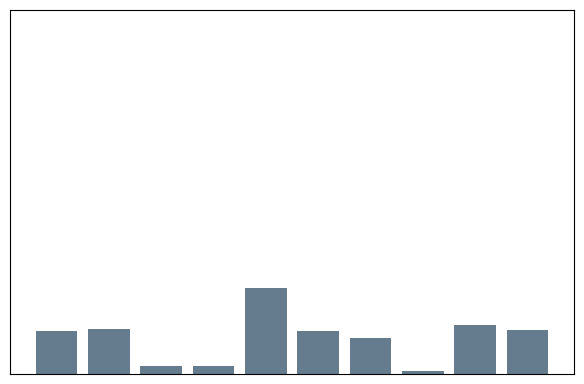

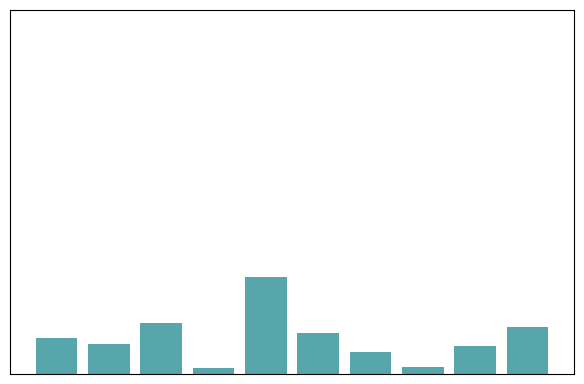

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for each distribution
num_classes = 10

for c, max_prob in zip(["#B46504", "#23445D", "#0E8088"], [0.7, 0.5, 0.55]):
    # Model prediction distribution - more confident, but not perfect
    model_prediction = np.random.rand(num_classes) * 0.3  # Small probabilities for other classes
    model_prediction[4] = max_prob  # Ensure target class has a high probability
    model_prediction /= model_prediction.sum()  # Normalize to make it a valid probability distribution

    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(6, 4), sharey=True)

    # First plot: Target distribution
    ax.bar(range(num_classes), model_prediction, color=c, alpha=0.7)
    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_ylim(0, 1)  # Probability limits
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

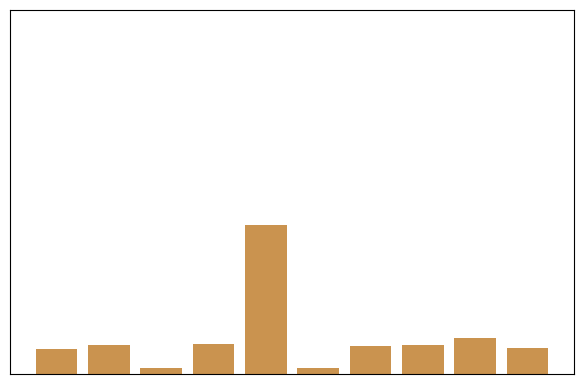

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for each distribution
num_classes = 10

# Model prediction distribution - more confident, but not perfect
model_prediction = np.random.rand(num_classes) * 0.3  # Small probabilities for other classes
model_prediction[4] = 1.2  # Ensure target class has a high probability
model_prediction /= model_prediction.sum()  # Normalize to make it a valid probability distribution

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(6, 4), sharey=True)

# First plot: Target distribution
ax.bar(range(num_classes), model_prediction, color="#B46504", alpha=0.7)
ax.set_xticks([])
ax.set_yticks([])

ax.set_ylim(0, 1)  # Probability limits
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

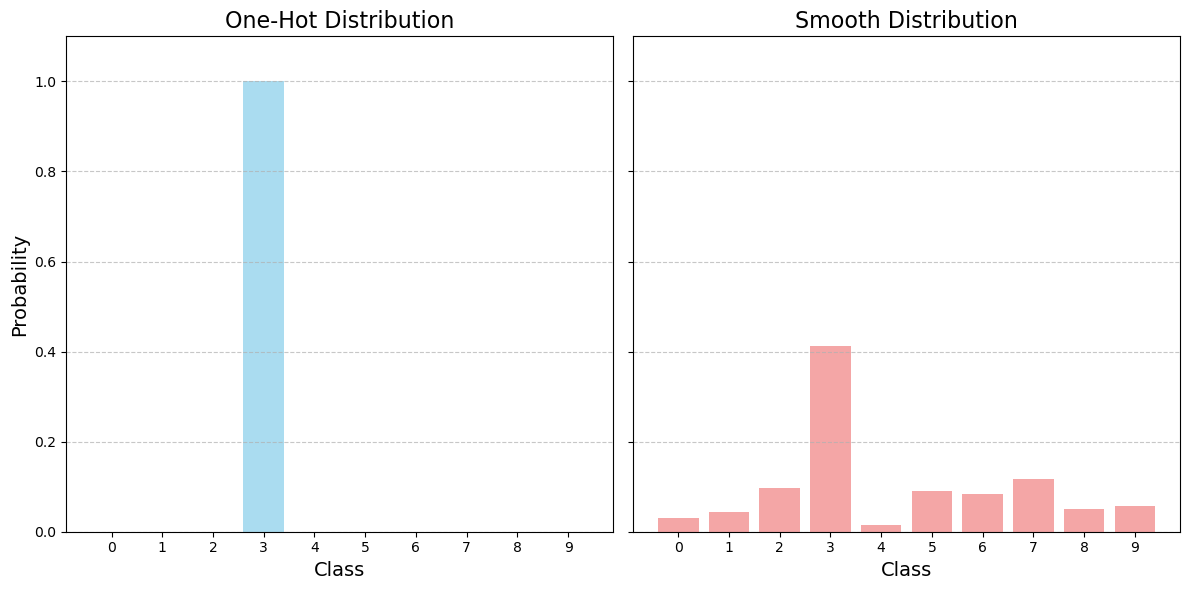

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for each distribution
num_classes = 10
target_distribution = np.zeros(num_classes)
target_class = 3  # Index of the class with probability 1.0
target_distribution[target_class] = 1.0

# Model prediction distribution - more confident, but not perfect
model_prediction = np.random.rand(num_classes) * 0.3  # Small probabilities for other classes
model_prediction[target_class] = 0.85  # Ensure target class has a high probability
model_prediction /= model_prediction.sum()  # Normalize to make it a valid probability distribution

# Smoothed prediction distribution using temperature scaling
temperature = 2.0
smoothed_prediction = np.exp(np.log(model_prediction) / temperature)
smoothed_prediction /= smoothed_prediction.sum()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# First plot: Target distribution
axes[0].bar(range(num_classes), target_distribution, color='skyblue', alpha=0.7)
axes[0].set_title("One-Hot Distribution", fontsize=16)
axes[0].set_xlabel("Class", fontsize=14)
axes[0].set_ylabel("Probability", fontsize=14)

# Second plot: Model prediction
axes[1].bar(range(num_classes), model_prediction, color='lightcoral', alpha=0.7)
axes[1].set_title("Smooth Distribution", fontsize=16)
axes[1].set_xlabel("Class", fontsize=14)

# # Third plot: Smoothed prediction
# axes[2].bar(range(num_classes), smoothed_prediction, color='lightgreen', alpha=0.7)
# axes[2].set_title(f"Smoothed Prediction ($\\tau$={temperature})", fontsize=16)
# axes[2].set_xlabel("Class", fontsize=14)

# Set common properties
for ax in axes:
    ax.set_xticks(range(num_classes))
    ax.set_ylim(0, 1.1)  # Probability limits
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_5036/4044398522.py:54: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 1500)


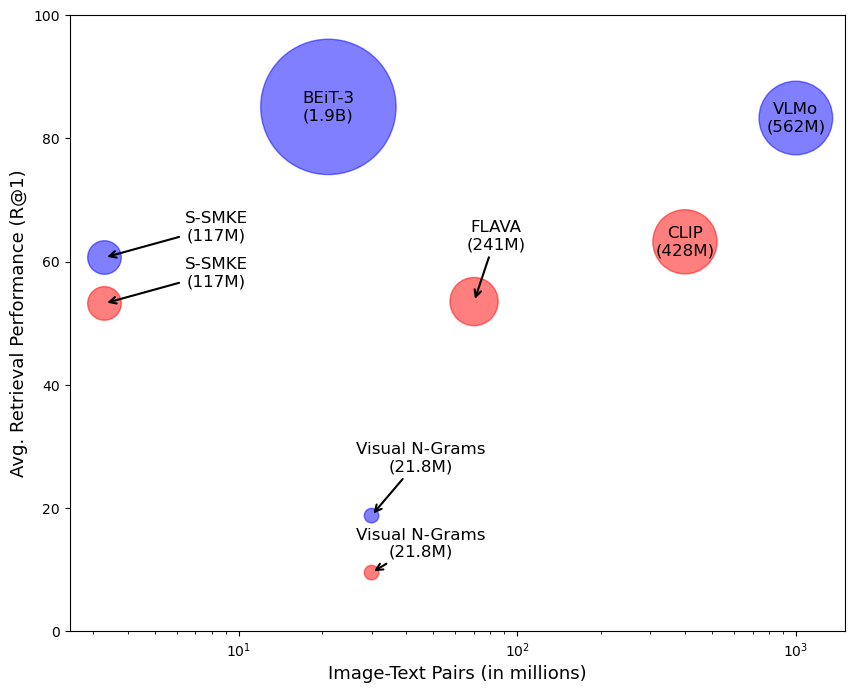

In [27]:
import matplotlib.pyplot as plt

x = [21, 400, 1000, 70, 3.3, 30, 30, 3.3]
y = [85.1, 63.2, 83.3, 53.5, 53.2, 9.5, 18.75, 60.65]
factor=5
sizes = np.array([1900, 428, 562, 241, 117, 21.8, 21.8, 117])
sizes = sizes * factor
labels = ['BEiT-3\n(1.9B)', 'CLIP\n(428M)', 'VLMo\n(562M)', 'FLAVA\n(241M)', 'S-SMKE\n(117M)', 'Visual N-Grams\n(21.8M)',
          'Visual N-Grams\n(21.8M)', 'S-SMKE\n(117M)']
color = ['blue', 'red', 'blue', 'red', 'red', 'red', 'blue', 'blue']

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.scatter(x, y, s=sizes, color=color, alpha=0.5)

# Define a threshold size to decide whether to place text inside or outside
threshold_size = 300  # Adjust this value based on your data

# Add text labels
for i, label in enumerate(labels):
    if sizes[i]/factor >= threshold_size:
        # Place text inside large bubbles
        plt.text(x[i], y[i], label,
                 ha='center', va='center', fontsize=12, color='black')
    else:
        if 'FLAVA' in label:
            x_text = x[i] * 1.2
            y_scale = y[i] * 1.2
        elif 'Visual' in label:
            x_text = x[i] * 1.5
            y_scale = y[i] * 1.5
        else:
            x_text = x[i] + 5
            y_scale = y[i] + 5
        plt.annotate(
            label,
            xy=(x[i], y[i]),
            xytext=(x_text, y_scale),
            textcoords='data',
            ha='center', va='center',
            fontsize=12,
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5)
        )

# for i, label in enumerate(labels):
#     ax.text(x[i], y[i], label,
#              ha='center', va='center', fontsize=12, color='black')

# Adding labels and title
ax.set_xlabel('Image-Text Pairs (in millions)', fontsize=13)
ax.set_ylabel('Avg. Retrieval Performance (R@1)', fontsize=13)
ax.set_xscale('log')

ax.set_xlim(0, 1500)
ax.set_ylim(0, 100)

# Show plot
plt.show()

In [9]:
data2 = pd.read_csv('data/itm.csv')

In [17]:
pd.read_csv('data/itm_val.csv')

,Step,Sx3HRe_proj_head_itm_mlp_d_0.1 - val/itm_acc,Sx3HRe_proj_head_itm_mlp_d_0.1 - val/itm_acc__MIN,Sx3HRe_proj_head_itm_mlp_d_0.1 - val/itm_acc__MAX
0,254,0.623198,0.623198,0.623198
1,511,0.586871,0.586871,0.586871
2,766,0.596616,0.596616,0.596616
3,1023,0.592320,0.592320,0.592320
4,1278,0.603294,0.603294,0.603294
5,1535,0.601704,0.601704,0.601704


In [11]:
862*50

43100

In [12]:
data = np.ones((6375,))*0.6667

/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_91604/856632099.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])


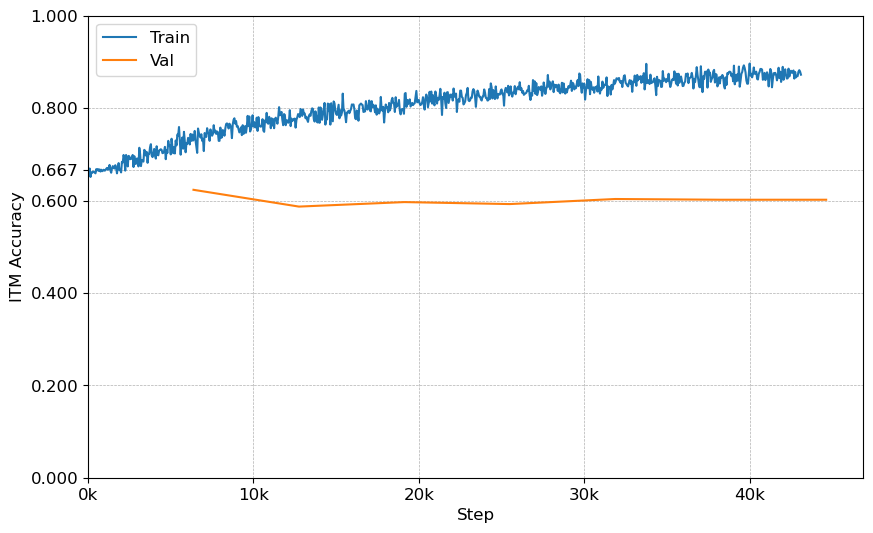

In [25]:
plt.rcParams.update({'font.size': 12})

data1 = pd.read_csv('data/itm_val.csv')
data1 = pd.concat([data1, data1.iloc[-1:]]).reset_index(drop=True)
data1 = data1[data1.columns[1]]
data1.index = np.arange(1, 8)*6375

data2 = pd.read_csv('data/itm.csv')
data2 = data2[data2.columns[1]]
data2.index = np.arange(50, 43150, 50)
fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(data2.index, data2, label='Train')
ax.plot(data1.index, data1, label='Val')

# Setting labels for x and y axis
ax.set_xlabel('Step')
ax.set_ylabel('ITM Accuracy')

# Setting the x-axis to be logarithmic
#ax.set_xscale('log', base=2)

# Enabling grid
ax.grid(True, which="both", ls="--", linewidth=0.5)

# start x-axis at 0
ax.set_xlim(left=0)
ax.set_ylim((0, 1))

# round x-ticks to thousands
ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])

current_ticks = plt.gca().get_yticks()

custom_tick = 0.6667
new_ticks = list(current_ticks) + [custom_tick]

plt.yticks(new_ticks)
plt.legend()
#plt.gca().set_yticklabels([str(int(tick)) if tick != custom_tick else 'Custom Tick' for tick in new_ticks])

# Save the plot as a .png file
#plt.savefig('/data')

# Show the plot
plt.show()


/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_12470/269400043.py:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(M, accuracy_bsz_128, '^-', linestyle='dashed', label='bsz=128')
/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_12470/269400043.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(M, accuracy_bsz_256, 's-', linestyle='dotted', label='bsz=256')
/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_12470/269400043.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(M, accuracy_bsz_512, 'x-', linestyle='dashdot', label='bsz=512')
/var/folders/gt/cjpcl37j

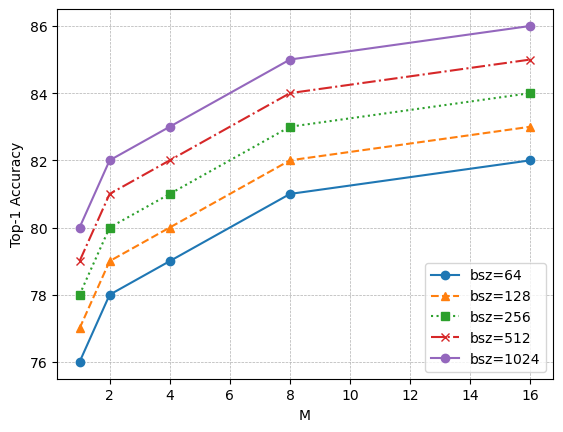

In [3]:
# Let's assume some data that could have generated the graph,
# since the exact data points are not given.
# M values
M = np.array([1, 2, 4, 8, 16])

# Top-1 Accuracy for different batch sizes (bsz)
accuracy_bsz_64 = np.array([76, 78, 79, 81, 82])
accuracy_bsz_128 = np.array([77, 79, 80, 82, 83])
accuracy_bsz_256 = np.array([78, 80, 81, 83, 84])
accuracy_bsz_512 = np.array([79, 81, 82, 84, 85])
accuracy_bsz_1024 = np.array([80, 82, 83, 85, 86])

# Create a new figure and axis object
fig, ax = plt.subplots()

# Plotting the lines for different batch sizes
ax.plot(M, accuracy_bsz_64, 'o-', label='bsz=64')
ax.plot(M, accuracy_bsz_128, '^-', linestyle='dashed', label='bsz=128')
ax.plot(M, accuracy_bsz_256, 's-', linestyle='dotted', label='bsz=256')
ax.plot(M, accuracy_bsz_512, 'x-', linestyle='dashdot', label='bsz=512')
ax.plot(M, accuracy_bsz_1024, 'o-', linestyle='solid', label='bsz=1024')

# Adding legend to the plot
ax.legend()

# Setting labels for x and y axis
ax.set_xlabel('M')
ax.set_ylabel('Top-1 Accuracy')

# Setting the x-axis to be logarithmic
#ax.set_xscale('log', base=2)

# Enabling grid
ax.grid(True, which="both", ls="--", linewidth=0.5)

# Save the plot as a .png file
#plt.savefig('/data')

# Show the plot
plt.show()


In [46]:
data1

,Step,Sx3HRe_proj_head_ema_mb_65536_single - val/multimodal-imagenet--zeroshot-val-top1,Sx3HRe_proj_head_ema_mb_65536_single - val/multimodal-imagenet--zeroshot-val-top1__MIN,Sx3HRe_proj_head_ema_mb_65536_single - val/multimodal-imagenet--zeroshot-val-top1__MAX
0,254,0.14794,0.14794,0.14794
1,511,0.18650,0.18650,0.18650
2,766,0.19738,0.19738,0.19738
3,1023,0.21170,0.21170,0.21170
4,1278,0.24334,0.24334,0.24334
5,1535,0.23752,0.23752,0.23752
6,1790,0.26026,0.26026,0.26026


In [4]:
pd.read_csv('mb.csv')

,trainer/global_step,Sx3HRe_ema_mb - _step,Sx3HRe_ema_mb - _step__MIN,Sx3HRe_ema_mb - _step__MAX,Sx3HRe_ema_mb - val/coco_retrieval,Sx3HRe_ema_mb - val/coco_retrieval__MIN,Sx3HRe_ema_mb - val/coco_retrieval__MAX
0,6375,254,254,254,50.737221,50.737221,50.737221
1,12751,511,511,511,52.964928,52.964928,52.964928
2,19127,766,766,766,54.826092,54.826092,54.826092
3,25503,1023,1023,1023,59.687744,59.687744,59.687744
4,31879,1278,1278,1278,62.461941,62.461941,62.461941
5,38255,1535,1535,1535,65.741386,65.741386,65.741386
6,44631,1790,1790,1790,67.507935,67.507935,67.507935


In [9]:
data2

Sx3HRe_tte - val/coco_retrieval
50.460346     254
57.747143     511
61.806305     766
64.755096    1023
66.687988    1278
68.147743    1535
68.423683    1790
Name: Sx3HRe_tte - _step, dtype: int64

/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_64193/1095160855.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])


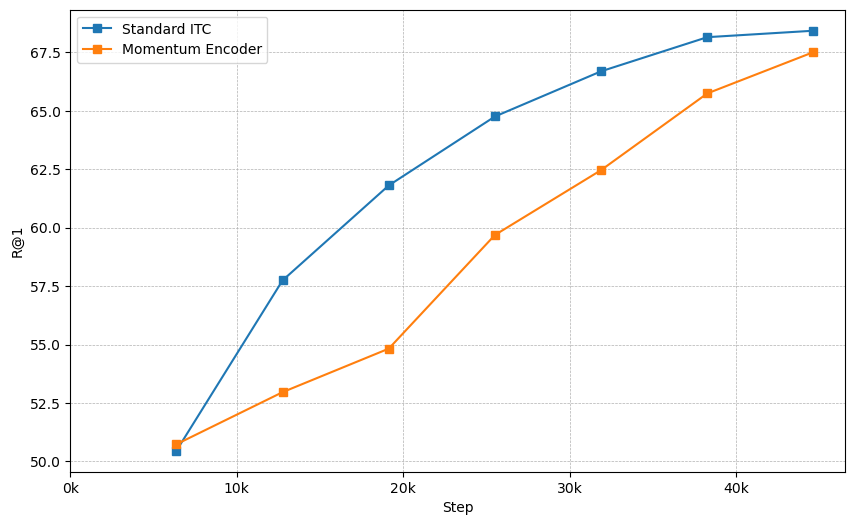

In [13]:
plt.rcParams.update({'font.size': 10})
data1 = pd.read_csv('mb.csv')
data1.index = data1['trainer/global_step']
data1=data1['Sx3HRe_ema_mb - val/coco_retrieval']
data2= pd.read_csv('n.csv')
data2.index = data2['trainer/global_step']
data2=data2['Sx3HRe_tte - val/coco_retrieval']


# Create a new figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the lines for different batch sizes
ax.plot(data2.index, data2, 's-', label='Standard ITC')
ax.plot(data2.index, data1, 's-', label='Momentum Encoder')


# Setting labels for x and y axis
ax.set_xlabel('Step')
ax.set_ylabel('R@1')

# Setting the x-axis to be logarithmic
#ax.set_xscale('log', base=2)

# Enabling grid
ax.grid(True, which="both", ls="--", linewidth=0.5)

# start x-axis at 0
ax.set_xlim(0)
#ax.set_ylim(0.5) -> imdb is binary with equal class distribution

# round x-ticks to thousands
ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])

plt.legend()
plt.show()


/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_75027/1568454637.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])


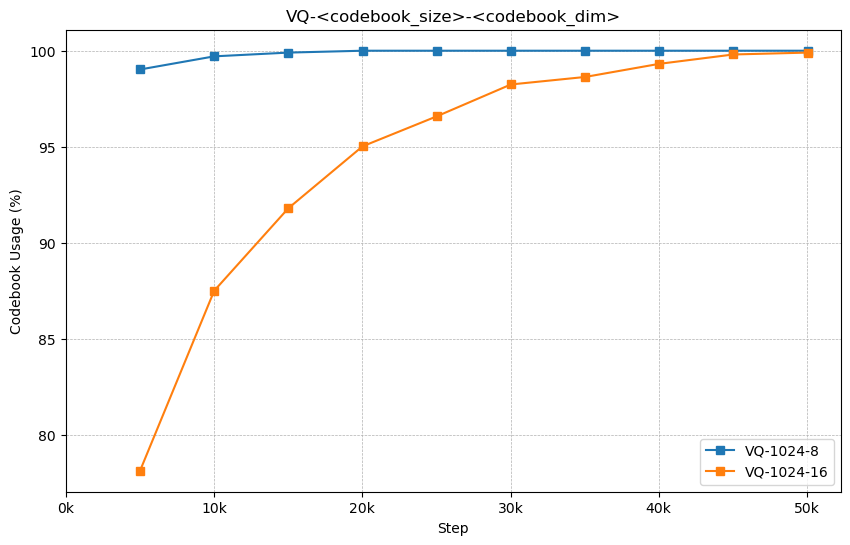

In [11]:
plt.rcParams.update({'font.size': 10})
vq_8 = pd.read_csv('vq_8.csv')['image_vq_8 - zero_cnt_percentage']
vq_16 = pd.read_csv('vq_16.csv')
step = vq_16['trainer/global_step']
vq_16 = vq_16['image_vq - zero_cnt_percentage']

# Create a new figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the lines for different batch sizes
ax.plot(step, 100-vq_8, 's-', label='VQ-1024-8')
ax.plot(step, 100-vq_16, 's-', label='VQ-1024-16')


# Setting labels for x and y axis
ax.set_xlabel('Step')
ax.set_ylabel('Codebook Usage (%)')

# Setting the x-axis to be logarithmic
#ax.set_xscale('log', base=2)

# Enabling grid
ax.grid(True, which="both", ls="--", linewidth=0.5)

# start x-axis at 0
ax.set_xlim(0)


# round x-ticks to thousands
ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])

ax.set_title('VQ-<codebook_size>-<codebook_dim>')

plt.legend()
plt.show()


/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_11581/241002718.py:29: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x_values[i], y_values[i], 's-', linestyle='dotted', color=c[i], linewidth=2, markersize=7)
/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_11581/241002718.py:29: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x_values[i], y_values[i], 's-', linestyle='dotted', color=c[i], linewidth=2, markersize=7)


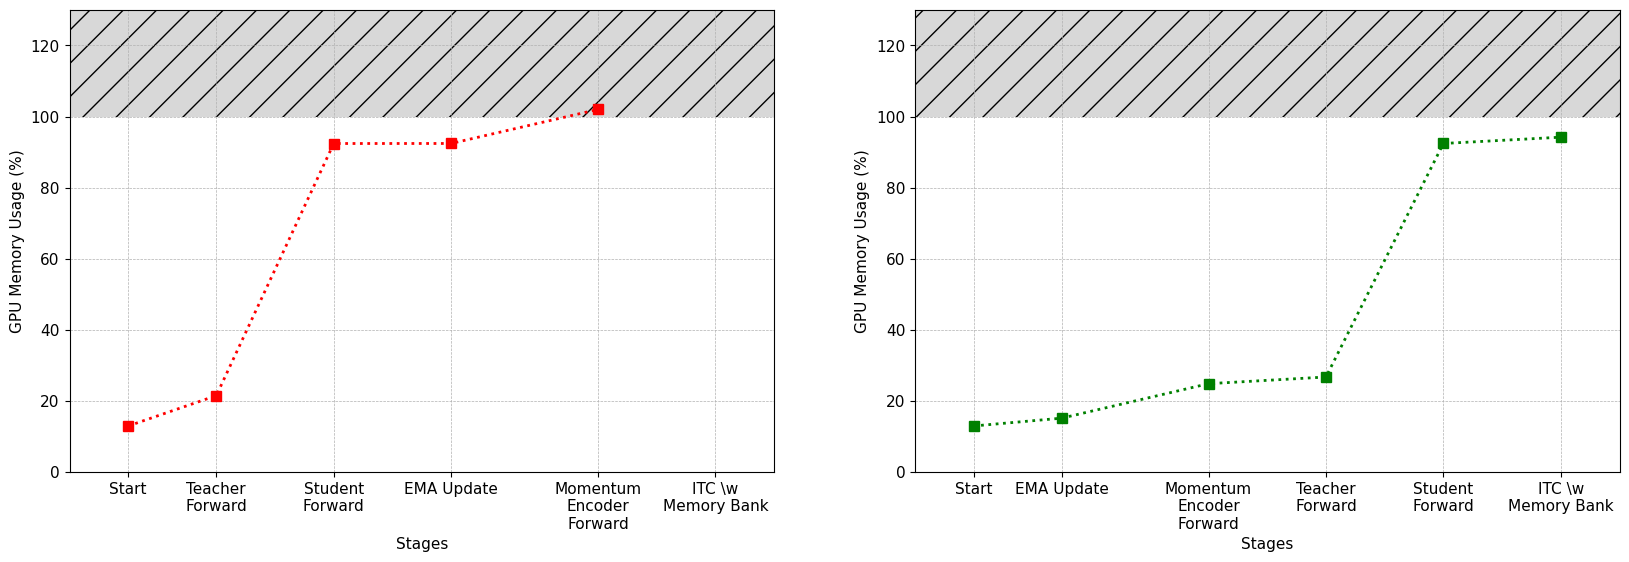

In [42]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 11})
# Define the x and y values
x_values = [
    [1, 1.75, 2.75, 3.75, 5, 6],
    [1, 1.75, 3, 4, 5, 6],
]
y_values = [
    [12.93, 21.47, 92.41, 92.42, 102, np.nan],
    [12.93, 15.13, 24.83, 26.71, 92.42, 94.19],
]

c=['red', 'green']
    
x_tick_labels = [
    ['Start', 'Teacher\nForward', 'Student\nForward', 'EMA Update', 'Momentum\nEncoder\nForward', 'ITC \w\nMemory Bank'],
    ['Start', 'EMA Update', 'Momentum\nEncoder\nForward', 'Teacher\nForward', 'Student\nForward', 'ITC \w\nMemory Bank'],
]

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
for i, ax in enumerate(axes):


    # Highlight the y area between 100 and 110 with a hatched style
    ax.axhspan(100, 130, facecolor='grey', alpha=0.3, hatch='/')

    # Create the line plot
    ax.plot(x_values[i], y_values[i], 's-', linestyle='dotted', color=c[i], linewidth=2, markersize=7)

    # Set the x-ticks to the x values and set custom tick labels
    ax.set_xticks(ticks=x_values[i], labels=x_tick_labels[i])
    ax.grid(True, which="both", ls="--", linewidth=0.5)
    # Add labels and title for clarity
    ax.set_xlabel('Stages')
    ax.set_ylabel('GPU Memory Usage (%)')
    ax.set_xlim(0.5, 6.5)
    ax.set_ylim(0, 130)

# Show the plot
plt.show()

In [27]:
data = pd.read_csv('data/test.csv')

In [28]:
data

,Step,imagenet_finetuning_grad_clip_2.0 - train/loss,imagenet_finetuning_grad_clip_2.0 - train/loss__MIN,imagenet_finetuning_grad_clip_2.0 - train/loss__MAX
0,1,0.006996,0.006996,0.006996
1,3,0.006950,0.006950,0.006950
2,5,0.006925,0.006925,0.006925
3,7,0.006912,0.006912,0.006912
4,9,0.006947,0.006947,0.006947
...,...,...,...,...
895,1805,0.004511,0.004511,0.004511
896,1807,0.003804,0.003804,0.003804
897,1809,0.004401,0.004401,0.004401
898,1811,0.004351,0.004351,0.004351


In [29]:
#data.index = np.arange(3002, 3002*15+1, 3002)
data.index = np.arange(50, 45_000+1, 50)

In [30]:
mask = np.zeros(len(data), dtype=bool)
mask[::4] = True

# Fill the values that are not kept with the previous kept value
data[~mask] = np.nan
data.fillna(method='ffill', inplace=True)

/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_97654/1998814200.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [38]:
data

50       0.006996
100      0.006950
150      0.006925
200      0.006912
250      0.006947
           ...   
44800    0.004501
44850    0.003811
44900    0.004396
44950    0.004351
45000    0.004600
Name: imagenet_finetuning_first - train/loss, Length: 900, dtype: float64

In [2]:
data = pd.read_csv('data/vg_itc.csv')

/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_33861/4006948526.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])
/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_33861/4006948526.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])


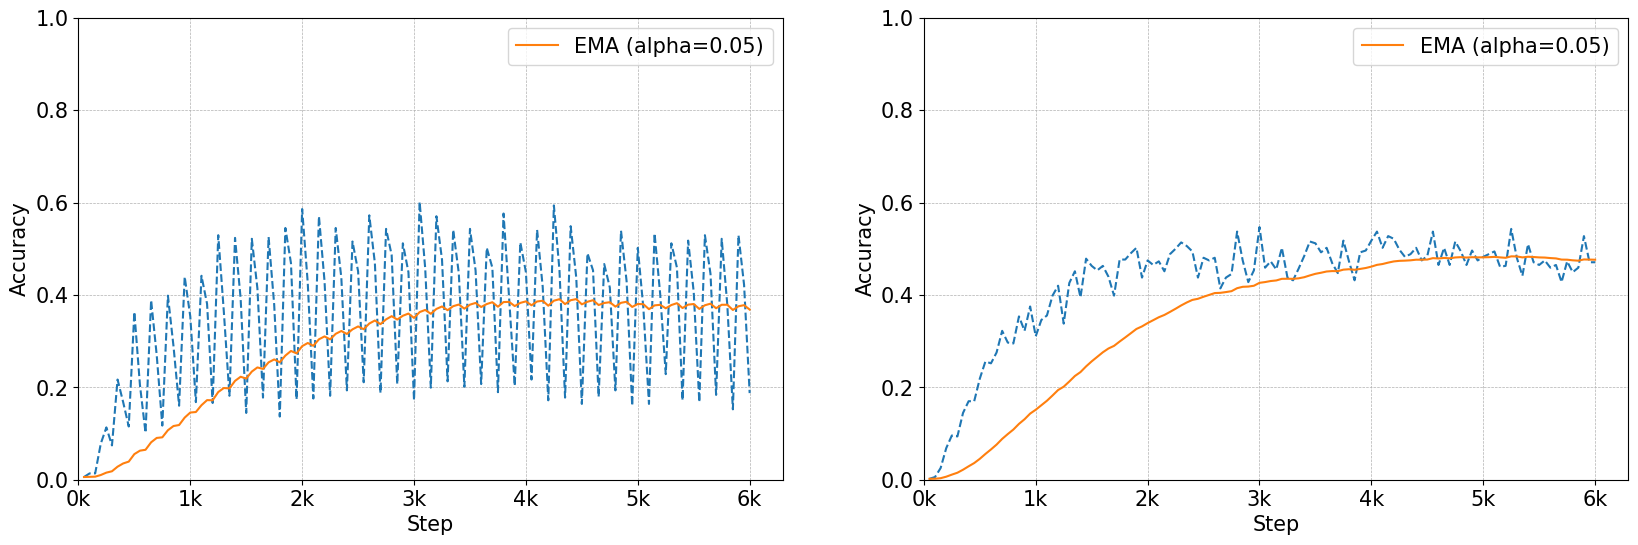

In [51]:
data1 = pd.read_csv('data/vg_itc.csv')
data1 = data1[data1.columns[1]]
data1.index = np.arange(50, 6_601, 50)
data2 = pd.read_csv('data/vg_itc_stable.csv')
data2 = data2[data2.columns[1]]
data2.index = np.arange(50, 60_501, 50)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
for ax, data in zip(axes, [data1, data2]):
    data = data[data.index <= 6000]
    def smooth_ema(series, alpha):
        return series.ewm(alpha=alpha, adjust=False).mean()

    # Adjust the alpha value (smoothing factor)
    alpha_value = 0.05  # This can be adjusted based on the slider value in WandB

    # Apply smoothing
    data_s = smooth_ema(data, alpha=alpha_value)

    # Plotting the lines for different batch sizes
    ax.plot(data.index, data, '--')
    ax.plot(data.index, data_s, '-', label='EMA (alpha=0.05)', color="#ff7f0e")


    # Setting labels for x and y axis
    ax.set_xlabel('Step')
    ax.set_ylabel('Accuracy')

    # Setting the x-axis to be logarithmic
    #ax.set_xscale('log', base=2)

    # Enabling grid
    ax.grid(True, which="both", ls="--", linewidth=0.5)

    # start x-axis at 0
    ax.set_xlim(left=0)
    ax.set_ylim((0, 1))

    # round x-ticks to thousands
    ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])
    ax.legend()

# Save the plot as a .png file
#plt.savefig('/data')

# Show the plot
plt.show()


/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_33861/1586795528.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])


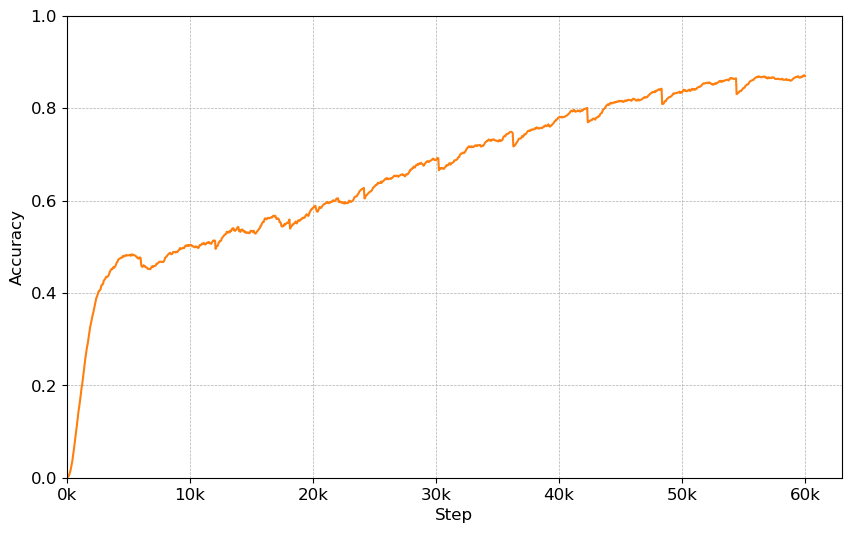

In [53]:
plt.rcParams.update({'font.size': 12})

data = pd.read_csv('data/vg_itc_stable.csv')
data = data[data.columns[1]]
data.index = np.arange(50, 60_501, 50)

fig, ax = plt.subplots(figsize=(10, 6))

def smooth_ema(series, alpha):
    return series.ewm(alpha=alpha, adjust=False).mean()

# Adjust the alpha value (smoothing factor)
alpha_value = 0.05
data = data[data.index <= 60000]
# Apply smoothing
data_s = smooth_ema(data, alpha=alpha_value)

# Plotting the lines for different batch sizes
#ax.plot(data.index, data, '--')
ax.plot(data.index, data_s, '-', color='#ff7f0e')


# Setting labels for x and y axis
ax.set_xlabel('Step')
ax.set_ylabel('Accuracy')

# Setting the x-axis to be logarithmic
#ax.set_xscale('log', base=2)

# Enabling grid
ax.grid(True, which="both", ls="--", linewidth=0.5)

# start x-axis at 0
ax.set_xlim(left=0)
ax.set_ylim((0, 1))

# round x-ticks to thousands
ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])

# Save the plot as a .png file
#plt.savefig('/data')

# Show the plot
plt.show()


In [10]:
data = pd.read_csv('data/train.csv')['image_kd - train/loss']
data.index = np.arange(50, 50_040+1, 50)
data_val = pd.read_csv('data/val.csv')['image_kd - val/loss']
data_val.index = np.arange(5004, 50040+1, 5004)

In [11]:
data_val

5004     0.109050
10008    0.099584
15012    0.102370
20016    0.094355
25020    0.092220
30024    0.089988
35028    0.087268
40032    0.085861
45036    0.084793
50040    0.084465
Name: image_kd - val/loss, dtype: float64

/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_1898/2523474032.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])


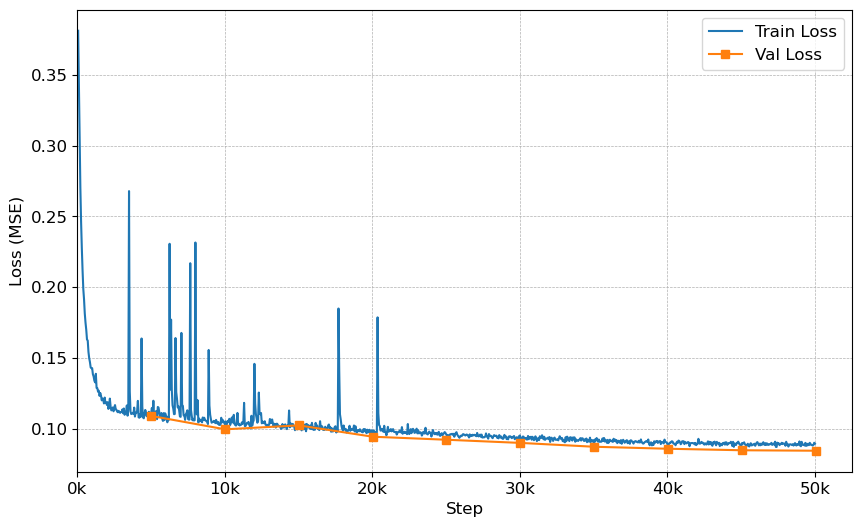

In [17]:
plt.rcParams.update({'font.size': 12})

data = pd.read_csv('data/train.csv')['image_kd - train/loss']
data.index = np.arange(50, 50_040+1, 50)
data_val = pd.read_csv('data/val.csv')['image_kd - val/loss']
data_val.index = np.arange(5004, 50040+1, 5004)

fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(data.index, data, label='Train Loss')
ax.plot(data_val.index, data_val, 's-', label='Val Loss')


# Setting labels for x and y axis
ax.set_xlabel('Step')
ax.set_ylabel('Loss (MSE)')

# Setting the x-axis to be logarithmic
#ax.set_xscale('log', base=2)

# Enabling grid
ax.grid(True, which="both", ls="--", linewidth=0.5)

# start x-axis at 0
ax.set_xlim(left=0)

# round x-ticks to thousands
ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])

# Save the plot as a .png file
#plt.savefig('/data')
plt.legend()
# Show the plot
plt.show()


In [5]:
pd.read_csv('pl1.csv')

,trainer/global_step,Sx3HRe - _step,Sx3HRe - _step__MIN,Sx3HRe - _step__MAX,Sx3HRe - train/kd_image_loss,Sx3HRe - train/kd_image_loss__MIN,Sx3HRe - train/kd_image_loss__MAX
0,49,1,1,1,4.786955,4.786955,4.786955
1,99,3,3,3,4.681221,4.681221,4.681221
2,149,5,5,5,4.180129,4.180129,4.180129
3,199,7,7,7,3.777266,3.777266,3.777266
4,249,9,9,9,3.537199,3.537199,3.537199
...,...,...,...,...,...,...,...
887,44399,1781,1781,1781,0.838949,0.838949,0.838949
888,44449,1783,1783,1783,0.829817,0.829817,0.829817
889,44499,1785,1785,1785,0.812210,0.812210,0.812210
890,44549,1787,1787,1787,0.844876,0.844876,0.844876


/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_46086/1667294188.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])


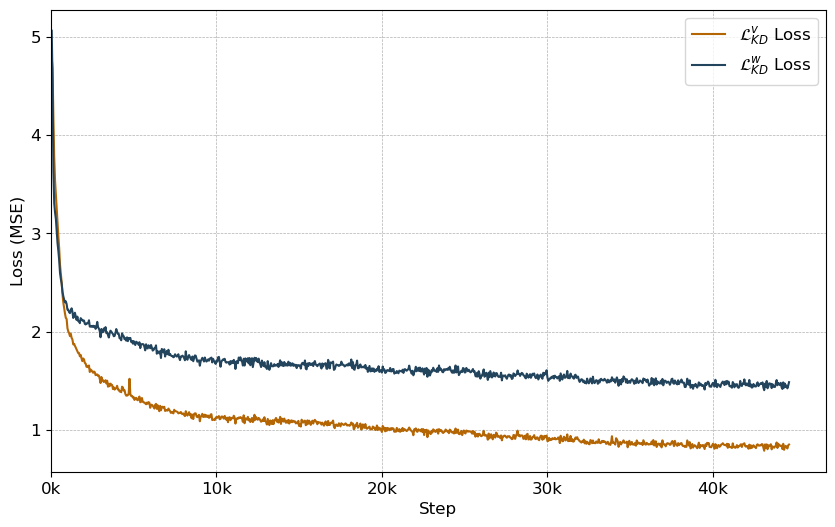

In [3]:
plt.rcParams.update({'font.size': 12})

data = pd.read_csv('pl1.csv')['Sx3HRe - train/kd_image_loss']
data.index = np.arange(50, 44600+1, 50)
data_val = pd.read_csv('pl2.csv')['Sx3HRe - train/kd_text_loss']
data_val.index = np.arange(50, 44600+1, 50)

fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(data.index, data, label='$\mathcal{L}_{KD}^{i2i}$ Loss', color='#B46504')
ax.plot(data_val.index, data_val, label='$\mathcal{L}_{KD}^{t2i}$ Loss', color='#23445D')


# Setting labels for x and y axis
ax.set_xlabel('Step')
ax.set_ylabel('Cross-Entropy Loss')

# Setting the x-axis to be logarithmic
#ax.set_xscale('log', base=2)

# Enabling grid
ax.grid(True, which="both", ls="--", linewidth=0.5)

# start x-axis at 0
ax.set_xlim(left=0)

# round x-ticks to thousands
ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])

# Save the plot as a .png file
#plt.savefig('/data')
plt.legend()
# Show the plot
plt.show()


/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_37935/711606532.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])


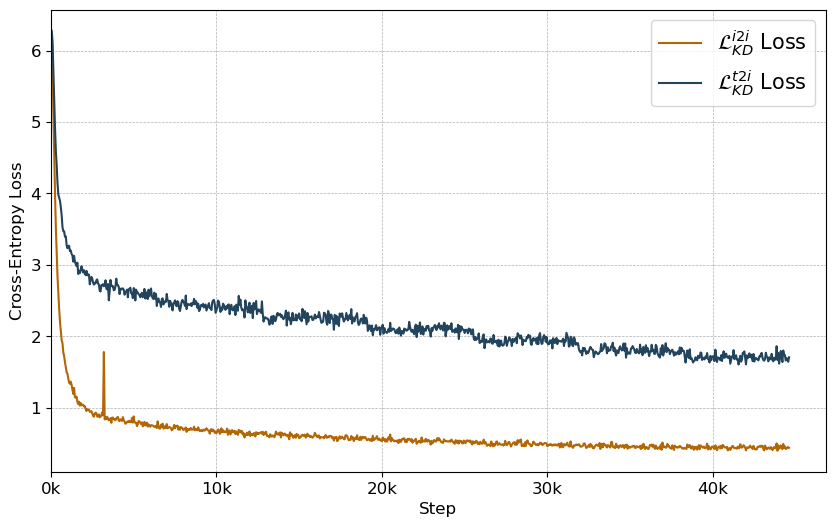

In [4]:
plt.rcParams.update({'font.size': 12})

data = pd.read_csv('pl1.csv')['Sx3HRe_ibn - train/kd_image_loss']
data.index = np.arange(50, 44600+1, 50)
data_val = pd.read_csv('pl2.csv')['Sx3HRe_ibn - train/kd_text_loss']
data_val.index = np.arange(50, 44600+1, 50)

fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(data.index, data, label='$\mathcal{L}_{KD}^{i2i}$ Loss', color='#B46504')
ax.plot(data_val.index, data_val, label='$\mathcal{L}_{KD}^{t2i}$ Loss', color='#23445D')


# Setting labels for x and y axis
ax.set_xlabel('Step')
ax.set_ylabel('Cross-Entropy Loss')

# Setting the x-axis to be logarithmic
#ax.set_xscale('log', base=2)

# Enabling grid
ax.grid(True, which="both", ls="--", linewidth=0.5)

# start x-axis at 0
ax.set_xlim(left=0)

# round x-ticks to thousands
ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])

# Save the plot as a .png file
#plt.savefig('/data')
plt.legend(fontsize=15)
# Show the plot
plt.show()


In [14]:
34199/4

8549.75

In [13]:
index

0         49
1         99
2        149
3        199
4        249
       ...  
719    35999
720    36049
721    36099
722    36149
723    36199
Name: trainer/global_step, Length: 724, dtype: int64

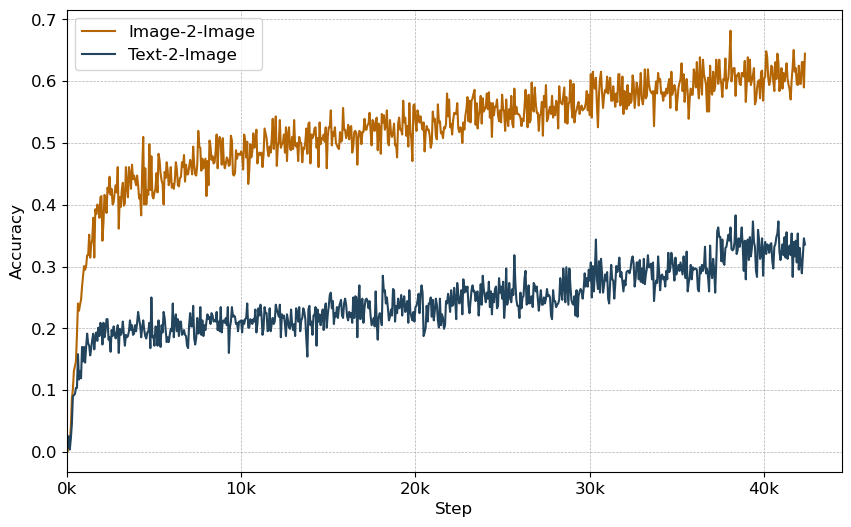

In [18]:
plt.rcParams.update({'font.size': 12})

image = pd.read_csv('image.csv')
index = image['trainer/global_step']
image = image['Sx3HRe_vq - train/kd_image_acc']
text = pd.read_csv('text.csv')['Sx3HRe_vq - train/kd_text_acc']

fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(index, image, label='Image-2-Image', color='#B46504')
ax.plot(index, text, label='Text-2-Image', color='#23445D')


# Setting labels for x and y axis
ax.set_xlabel('Step')
ax.set_ylabel('Accuracy')

# Setting the x-axis to be logarithmic
#ax.set_xscale('log', base=2)

# Enabling grid
ax.grid(True, which="both", ls="--", linewidth=0.5)

# start x-axis at 0
ax.set_xlim(left=0)

ax.set_xticks(np.arange(0, 36199, 8549))
# round x-ticks to thousands
ax.set_xticklabels([f'{x}k' for x in [0, 10, 20, 30, 40]])

# Save the plot as a .png file
#plt.savefig('/data')
plt.legend()
# Show the plot
plt.show()


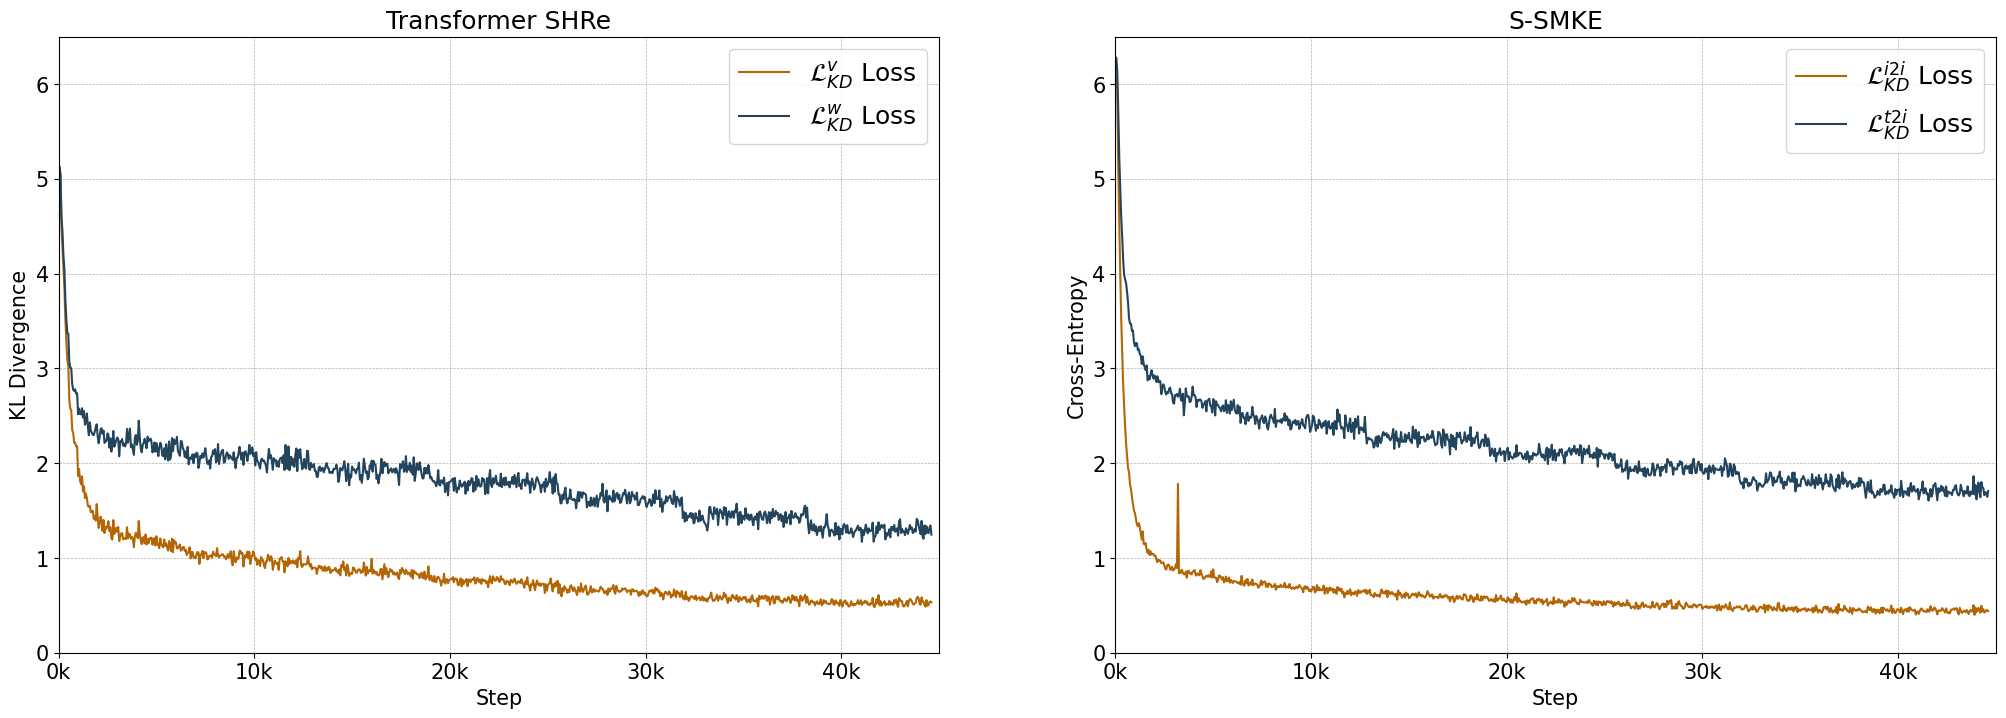

In [17]:
plt.rcParams.update({'font.size': 15})

data_kd_1 = pd.read_csv('pl1.csv')['Sx3HRe_ibn - train/kd_image_loss']
data_kd_1.index = np.arange(50, 44600+1, 50)
data_kd_2 = pd.read_csv('pl2.csv')['Sx3HRe_ibn - train/kd_text_loss']
data_kd_2.index = np.arange(50, 44600+1, 50)

data_kl_1 = pd.read_csv('pl3.csv')['SHRe_transformer_only - train/kl_image_loss']
data_kl_1.index = np.arange(50, 44600+1, 50)
data_kl_2 = pd.read_csv('pl4.csv')['SHRe_transformer_only - train/kl_text_loss']
data_kl_2.index = np.arange(50, 44600+1, 50)

labels = [['$\mathcal{L}_{KD}^{v}$ Loss', '$\mathcal{L}_{KD}^{w}$ Loss'], ['$\mathcal{L}_{KD}^{i2i}$ Loss', '$\mathcal{L}_{KD}^{t2i}$ Loss']]
data = [[data_kl_1, data_kl_2], [data_kd_1, data_kd_2]]
loss_labels = ['KL Divergence', 'Cross-Entropy']
titles = ['Transformer SHRe', 'S-SMKE']
fig, axes = plt.subplots(1, 2, figsize=(25, 8))
for i, (ax, [data_img, data_txt], [label_img, label_txt], loss_label, title) in enumerate(zip(axes, data, labels, loss_labels, titles)):

    ax.plot(data_img.index, data_img, label=label_img, color='#B46504')
    ax.plot(data_txt.index, data_txt, label=label_txt, color='#23445D')


    # Setting labels for x and y axis
    ax.set_xlabel('Step')
    ax.set_ylabel(loss_label)

    # Setting the x-axis to be logarithmic
    #ax.set_xscale('log', base=2)

    # Enabling grid
    ax.grid(True, which="both", ls="--", linewidth=0.5)

    # start x-axis at 0
    ax.set_xlim(left=0, right=45000)
    ax.set_ylim(0, 6.5)

    # only 10k steps
    ax.set_xticks(np.arange(0, 45001, 10000))
    # round x-ticks to thousands
    ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])
    ax.set_title(title)

    ax.legend(fontsize=18)
# Show the plot
plt.show()
plt.rcParams.update({'font.size': 12})

In [7]:
data.loc[data.index <= 6000]

50      0.000000
100     0.001953
150     0.018555
200     0.029297
250     0.054688
          ...   
5800    0.718750
5850    0.710938
5900    0.691406
5950    0.687500
6000    0.666016
Name: Sx3HRe_head - train/x_itc_acc, Length: 120, dtype: float64

/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_68961/892339731.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])


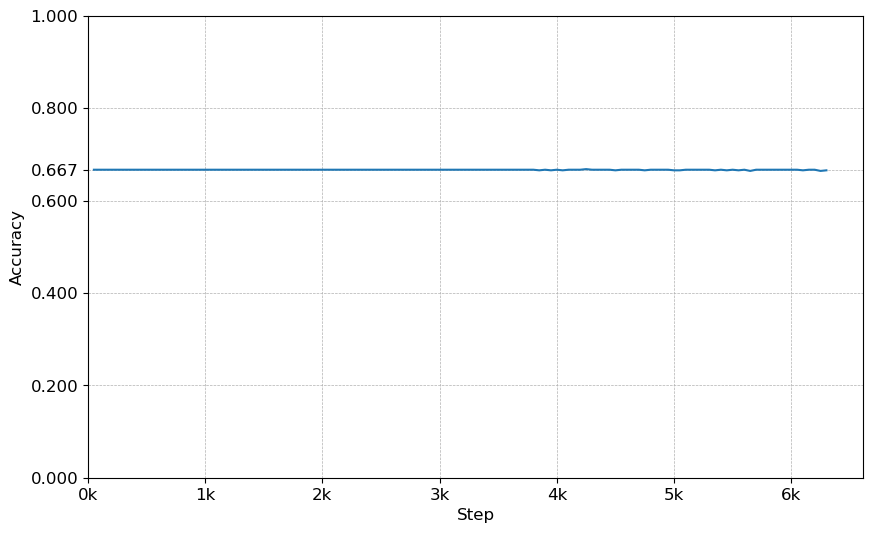

In [21]:
plt.rcParams.update({'font.size': 12})

data = pd.read_csv('acc.csv')['Sx3HRe_itm - train/itm_acc']
data.index = np.arange(50, 7700+1, 50)
data = data.loc[data.index <= 6300]
fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(data.index, data)


# Setting labels for x and y axis
ax.set_xlabel('Step')
ax.set_ylabel('Accuracy')

# Setting the x-axis to be logarithmic
#ax.set_xscale('log', base=2)

# Enabling grid
ax.grid(True, which="both", ls="--", linewidth=0.5)

# start x-axis at 0
ax.set_xlim(left=0)
ax.set_ylim(0, 1)

# round x-ticks to thousands
ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])

current_ticks = plt.gca().get_yticks()

custom_tick = 0.667
new_ticks = list(current_ticks) + [custom_tick]

plt.yticks(new_ticks)


# Show the plot
plt.show()


/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_46086/2954332395.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])
/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_46086/2954332395.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])


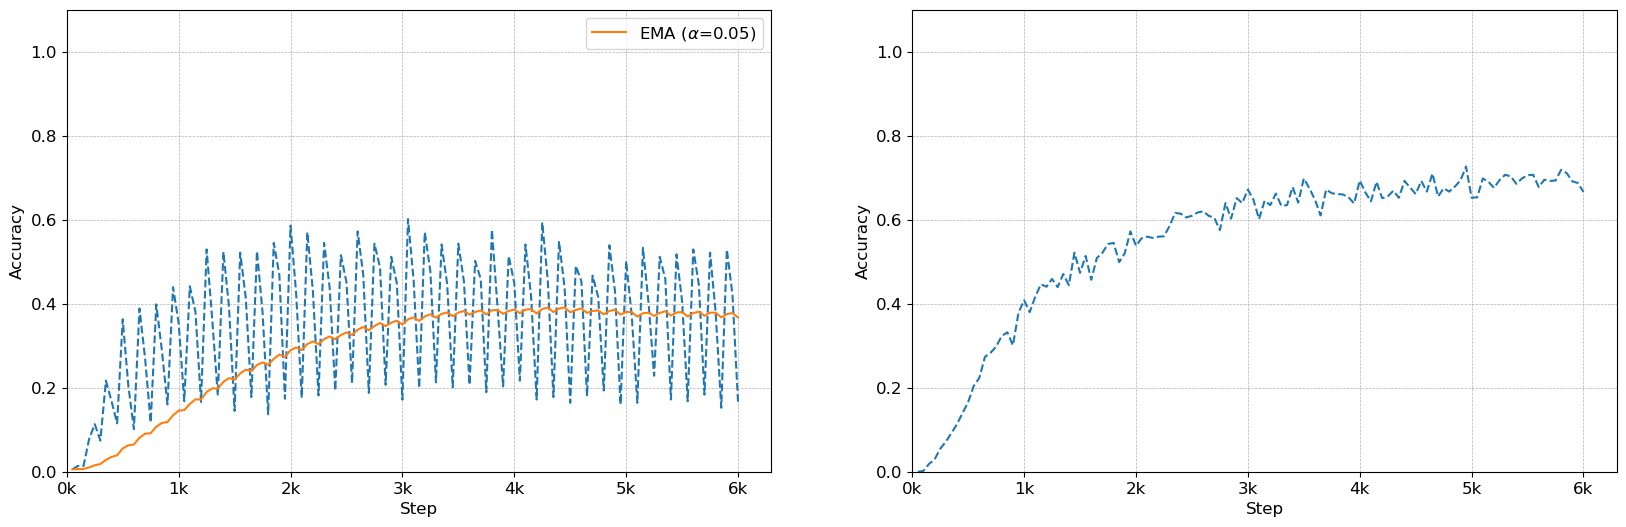

In [34]:
data1 = pd.read_csv('pl3.csv')['Sx3HRe_head - train/x_itc_acc']
data1.index = np.arange(50, 44600+1, 50)
data1 = data1.loc[data1.index <= 6000]
data2 = pd.read_csv('vg_unstable.csv')['SHRe_vg_unstable - train/itc_acc']
data2.index = np.arange(50, 6550+1, 50)
data2 = data2.loc[data2.index <= 6000]

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
for i, (ax, data) in enumerate(zip(axes, [data2, data1])):
    def smooth_ema(series, alpha):
        return series.ewm(alpha=alpha, adjust=False).mean()

    # Adjust the alpha value (smoothing factor)
    alpha_value = 0.05  # This can be adjusted based on the slider value in WandB

    # Apply smoothing
    data_s = smooth_ema(data, alpha=alpha_value)

    # Plotting the lines for different batch sizes
    ax.plot(data.index, data, '--')
    if i==0:
        ax.plot(data.index, data_s, '-', label=r'EMA ($\alpha$=0.05)', color="#ff7f0e")


    # Setting labels for x and y axis
    ax.set_xlabel('Step')
    ax.set_ylabel('Accuracy')

    # Setting the x-axis to be logarithmic
    #ax.set_xscale('log', base=2)

    # Enabling grid
    ax.grid(True, which="both", ls="--", linewidth=0.5)

    # start x-axis at 0
    ax.set_xlim(left=0)
    ax.set_ylim((0, 1.1))

    # round x-ticks to thousands
    ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])
    if i==0:
        ax.legend()

# Save the plot as a .png file
#plt.savefig('/data')

# Show the plot
plt.show()


/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_68961/463691234.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])
/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_68961/463691234.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])


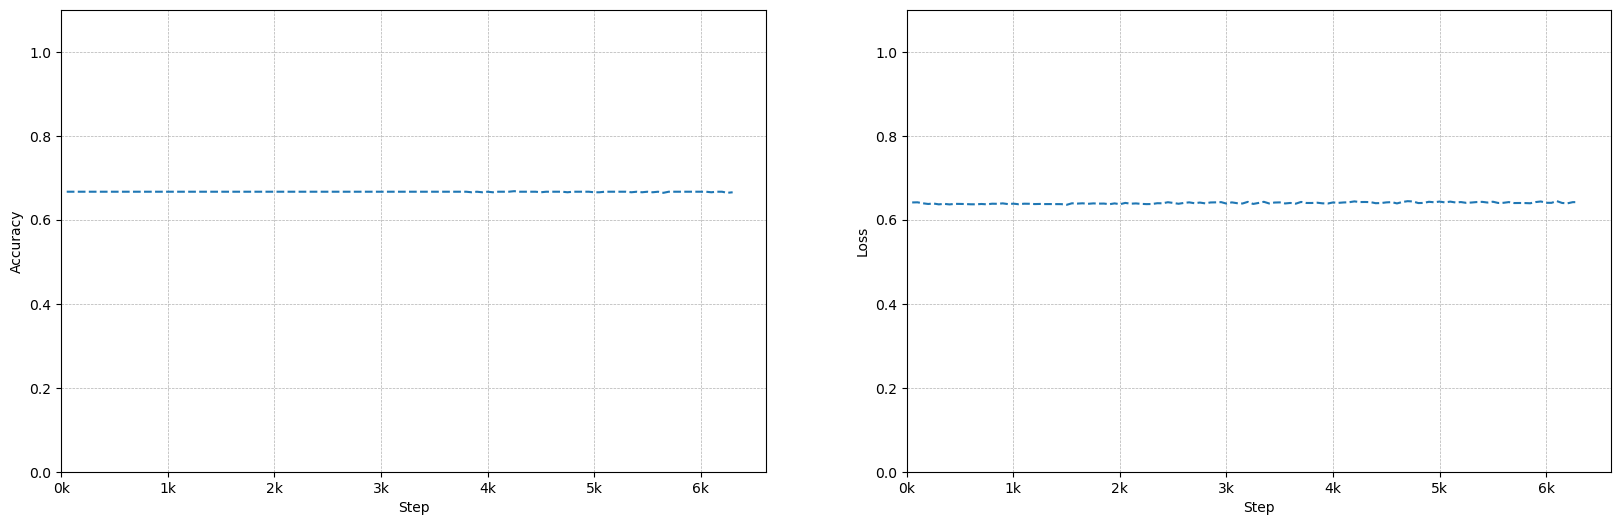

In [9]:
data1 = pd.read_csv('acc.csv')['Sx3HRe_itm - train/itm_acc']
data1.index = np.arange(50, 7700+1, 50)
data1 = data1.loc[data1.index <= 6300]
data2 = pd.read_csv('loss.csv')['Sx3HRe_itm - train/itm_loss']
data2.index = np.arange(50, 7700+1, 50)
data2 = data2.loc[data2.index <= 6300]

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
for i, (ax, data) in enumerate(zip(axes, [data1, data2])):
    # Plotting the lines for different batch sizes
    ax.plot(data.index, data, '--')


    # Setting labels for x and y axis
    ax.set_xlabel('Step')
    if i==1:
        ax.set_ylabel('Loss')
    else:
        ax.set_ylabel('Accuracy')

    # Setting the x-axis to be logarithmic
    #ax.set_xscale('log', base=2)

    # Enabling grid
    ax.grid(True, which="both", ls="--", linewidth=0.5)

    # start x-axis at 0
    ax.set_xlim(left=0)
    ax.set_ylim((0, 1.1))

    # round x-ticks to thousands
    ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])

# Save the plot as a .png file
#plt.savefig('/data')

# Show the plot
plt.show()
